# CNN for Digit Recognition

## 1. load data

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


digit = load_digits()

data_x = digit.data
data_y = digit.target


x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

## 2. data preprocess

In [21]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 8, 8
input_shape = (img_rows, img_cols)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (1437, 8, 8)
y_train shape: (1437,)
1437 train samples
360 test samples


## 3. CNN model

In [22]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv1D(32, kernel_size=3,
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


## 4. train & test

In [23]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1437 samples, validate on 360 samples
Epoch 1/12
1437/1437 [==============================] - 1s - loss: 2.3027 - acc: 0.1023 - val_loss: 2.3027 - val_acc: 0.0778
Epoch 2/12
1437/1437 [==============================] - 0s - loss: 2.3026 - acc: 0.0926 - val_loss: 2.3029 - val_acc: 0.0778
Epoch 3/12
1437/1437 [==============================] - 0s - loss: 2.3026 - acc: 0.0912 - val_loss: 2.3031 - val_acc: 0.0778
Epoch 4/12
1437/1437 [==============================] - 0s - loss: 2.3025 - acc: 0.1030 - val_loss: 2.3032 - val_acc: 0.0778
Epoch 5/12
1437/1437 [==============================] - 0s - loss: 2.3025 - acc: 0.0995 - val_loss: 2.3033 - val_acc: 0.0778
Epoch 6/12
1437/1437 [==============================] - 0s - loss: 2.3025 - acc: 0.1051 - val_loss: 2.3035 - val_acc: 0.0778
Epoch 7/12
1437/1437 [==============================] - 0s - loss: 2.3025 - acc: 0.1072 - val_loss: 2.3036 - val_acc: 0.0778
Epoch 8/12
1437/1437 [==============================] - 0s - loss: 2.3024 - ac

## 5. model visualize

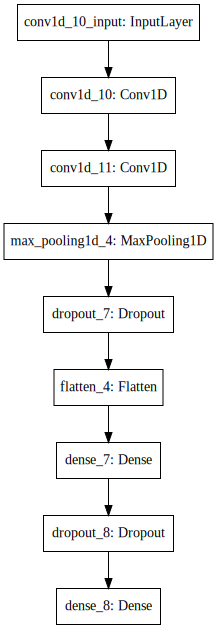

In [24]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))